# Part 1: Business problem

1. Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes
2. The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot
3. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255

dataset source: https://www.kaggle.com/zalando-research/fashionmnist

# Part 2: Data preprocessing

## Importing the libraries

In [1]:
# import libraries 
import numpy as np # Import Numpy for data statistical analysis
import pandas as pd # Import Pandas for data manipulation using dataframes
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

## Importing the dataset from kaggle

In [2]:
# Installing Kaggle API
! pip install -q kaggle

In [3]:
# Import API key to google colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vijaygadhave2014","key":"aa9593071132e2d4b0d7e3940a5b0946"}'}

In [4]:
# Make directory named kaggle and copy kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [92]:
# disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [5]:
# list of datasets (check if everything's okay by running this command)
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete            World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-14 18:29:44           4872  
gpreda/pfizer-vaccine-tweets                                  Pfizer Vaccine Tweets                               665KB  2021-01-20 08:29:59           2994  
arashnic/covid19-case-surveillance-public-use-dataset         Covid-19 Case Surveillance Public Use Dataset        46MB  2020-12-21 02:24:21           2522  
ashkhagan/women-representation-in-city-property-sanfrancisco  Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            613  
google/android-smartphones-high-accuracy-datasets   

In [6]:
# importing the dataset
! kaggle datasets download -d zalando-research/fashionmnist

 60% 41.0M/68.8M [00:01<00:01, 18.6MB/s]
100% 68.8M/68.8M [00:01<00:00, 46.0MB/s]


In [7]:
# unzipping the dataset
! unzip -q /content/fashionmnist.zip

y


In [8]:
fashion_train = pd.read_csv('/content/fashion-mnist_train.csv')
fashion_test = pd.read_csv('/content/fashion-mnist_test.csv')

## Dataset Visualization

In [9]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [12]:
fashion_test.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,37,93,72,58,55,63,66,89,159,120,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,22,67,125,151,168,...,112,115,117,117,113,146,41,0,3,0,0,0,0,0,0,0,1,0,1,76,54,55,51,53,53,55,53,44,38,37,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,0,0,76,36,110,170,78,136,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,...,94,84,70,44,0,36,152,65,110,0,0,0,0,0,0,0,21,57,89,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,0,1,3,0,14,152,184,158,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,219,223,226,239,247,241,224,213,144,0,0,0,0,0,0,1,0,44,232,199,200,190,180,179,185,189,191,185,179,178,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,131,192,79,0,0,0,0,...,13,26,17,8,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,103,99,102,101,104,119,118,122,130,129,127,166,128,0,0,0,0,0,0,0,0,0,0,0,0,18,211,212,212,225,...,217,206,211,217,219,216,249,222,0,0,0,0,0,0,0,0,0,0,58,94,104,109,113,105,92,53,0,65,152,120,111,95,75,44,1,0,0,0,0,0


In [13]:
fashion_train.shape

(60000, 785)

In [15]:
fashion_test.shape

(10000, 785)

In [16]:
type(fashion_train)

pandas.core.frame.DataFrame

In [17]:
# Create training and testing arrays
training = np.array(fashion_train, dtype = 'float32')
testing = np.array(fashion_test, dtype='float32')

In [18]:
type(training)

numpy.ndarray

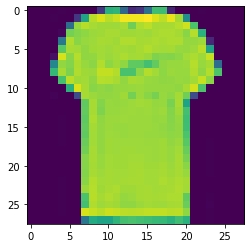

In [23]:
# visulize 1 image
plt.imshow(training[10, 1:].reshape(28,28))

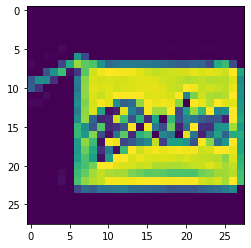

In [28]:
plt.imshow(training[500, 1:].reshape(28,28))

5.0


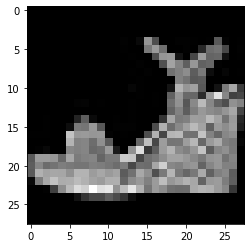

In [43]:
# Let's view some images!
import random
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image

# show the lebel as well
label = training[i,0]
print(label)

# 10 classes are as as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [ ]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

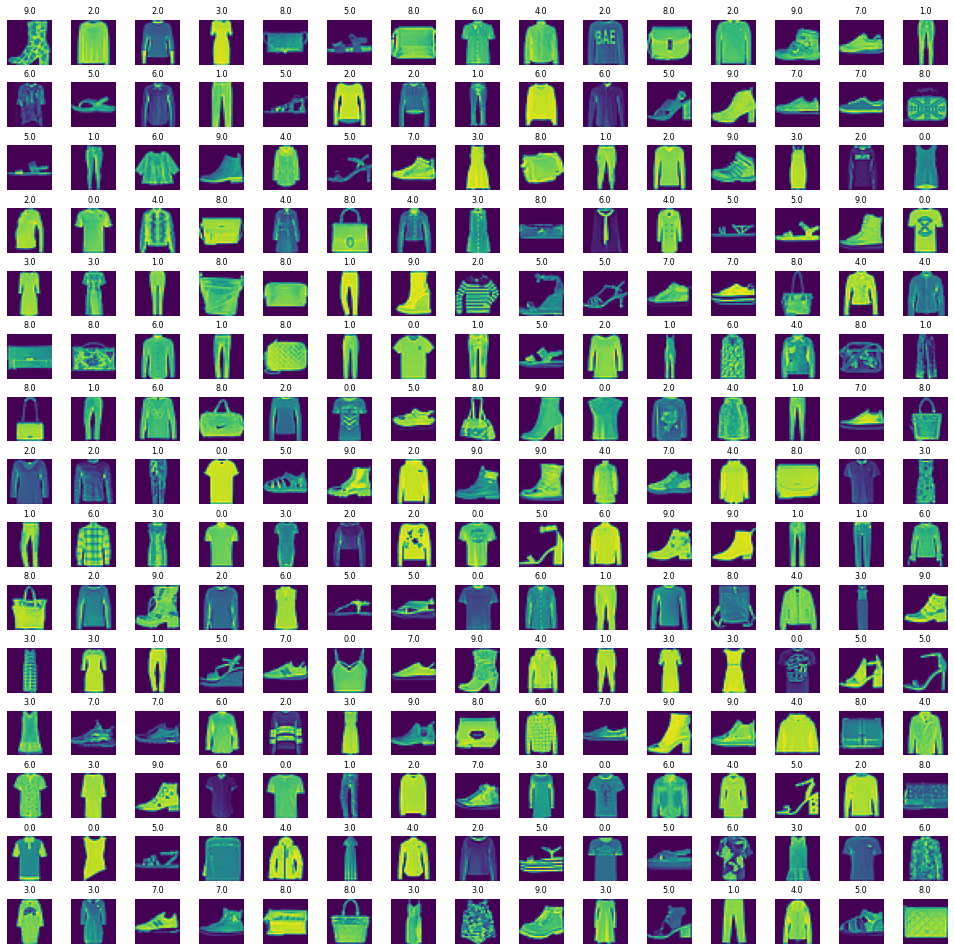

In [45]:
# Let's view more images in a grid format (matrix format)

# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# here we are creating the subplots with the dimentions of our grid
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

# flaten the 15 x 15 matrix into 225 array
axes = axes.ravel()
# get the length of the training dataset
n_training = len(training)

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4) # adjust the hight between the images

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

## Scale the dataset

In [56]:
# Prepare the training and testing dataset
x_train = training[:,1:]/255
y_train = training[:,0]

x_test = testing[:,1:]/255
y_test = testing[:,0]

In [57]:
x_train.shape

(60000, 784)

In [58]:
y_train.shape

(60000,)

In [60]:
x_test.shape

(10000, 784)

In [61]:
y_test.shape

(10000,)

## Create validation dataset (to avoid the overfitting)

In [53]:
# create validation dataset to avoid the overfitting
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [54]:
x_train.shape

(48000, 784)

In [55]:
y_train.shape

(48000,)

In [63]:
x_validate.shape

(12000, 784)

In [64]:
y_validate.shape

(12000,)

In [65]:
# all our data is in matrix format, 
# now reshape the data in the form of (28,28,1)

# * unpack the tuple
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28, 28, 1))

In [66]:
x_train.shape

(60000, 28, 28, 1)

In [67]:
x_test.shape

(10000, 28, 28, 1)

In [68]:
x_validate.shape

(12000, 28, 28, 1)

# Part 3: Train the model

In [69]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [72]:
# Initilize the model
model = tf.keras.models.Sequential()

In [73]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

In [74]:
model.add(tf.keras.layers.Flatten())

In [76]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [77]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [80]:
# Training the model
model.fit(x_train,y_train, batch_size=32, epochs=50, validation_data=(x_validate, y_validate))

Epoch 1/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6144 - sparse_categorical_accuracy: 0.7813 - val_loss: 0.3581 - val_sparse_categorical_accuracy: 0.8742
Epoch 2/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3460 - sparse_categorical_accuracy: 0.8783 - val_loss: 0.3000 - val_sparse_categorical_accuracy: 0.8957
Epoch 3/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3042 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.2665 - val_sparse_categorical_accuracy: 0.9057
Epoch 4/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2852 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.2518 - val_sparse_categorical_accuracy: 0.9096
Epoch 5/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2744 - sparse_categorical_accuracy: 0.9010 - val_loss: 0.2509 - val_sparse_categorical_accuracy: 0.9092
Epoch 6/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.

# Part 4: Evaluate the model

In [82]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2908 - sparse_categorical_accuracy: 0.9088


In [83]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.9088000059127808


In [84]:
# Model prediction
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [85]:
print(y_pred)

[0 1 6 ... 8 8 1]


In [86]:
y_pred[110],  y_test[110] # predicted and actual output

(5, 5.0)

In [88]:
# Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[910   0   8  14   5   0  54   1   8   0]
 [  3 990   2   3   2   0   0   0   0   0]
 [ 35   2 736  13 148   0  64   0   2   0]
 [ 17   9   1 911  40   0  22   0   0   0]
 [  2   0   9  14 940   0  33   0   2   0]
 [  0   1   0   0   0 975   0  13   1  10]
 [149   2  30  22  80   0 714   0   3   0]
 [  0   0   0   0   0   8   0 960   0  32]
 [  3   0   1   2   2   3   9   1 978   1]
 [  0   0   0   0   0   3   0  23   0 974]]


In [89]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9088


In [91]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.91      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.94      0.74      0.82      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.77      0.94      0.85      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.80      0.71      0.75      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
# The 10 classes:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot